# Capstone Project — The Battle of Neighbourhoods

### Introduction

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

### Questions that can be asked using the above mentioned datasets
* What is best location in New Delhi City for Chinese Cuisine ?
* Which areas have large number of Chinese Resturant Market ?
* Which all areas have less number of resturant ?
* Which is the best place to stay if I prefer Chinese Cuisine ?
* What places are have best restaurant in New Delhi?

### Approach
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)

In [6]:
import pandas as pd
import numpy as np
import requests # to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium
! pip install geocoder
import geocoder

Solving environment: ...working... done

# All requested packages already installed.



## Read zomato resaurant daat from csv file

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [9]:
df_india = df[df['Country Code']==1]
df_NDLS = df_india[df_india['City']=='New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning

### remove the unwanted columns and rows from dataset

In [11]:
df_Res = df_NDLS[df_NDLS.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters

In [13]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X= df_Res['Latitude']
Y= df_Res['Longitude']
Z= np.stack((X,Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red','green','blue','yellow','orange']
df_Res['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label= folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude], radius=5,
        popup=label, color='black', fill=True,
        fill_color = colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)
    
New_Delhi_Rest    

In [14]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

### What places are have best restaurant in New Delhi?

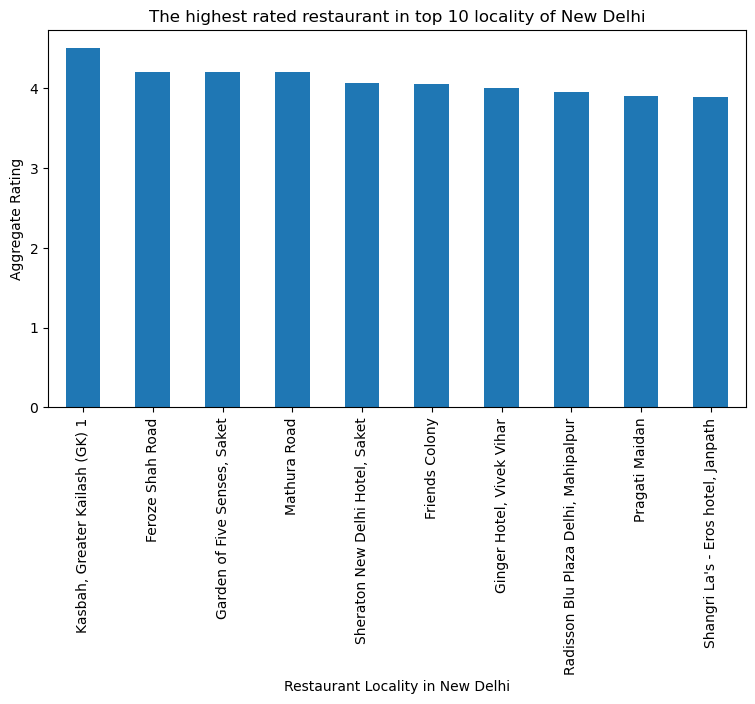

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi=100)

#title
plt.title('The highest rated restaurant in top 10 locality of New Delhi')

#bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

#x-axis
plt.xlabel('Restaurant Locality in New Delhi')
#y-axis
plt.ylabel('Aggregate Rating')
#display

plt.show()

the best restaurants are are available in Kesbah, Greater Kailash area.

### what places are have worst restaurants in New Delhi?

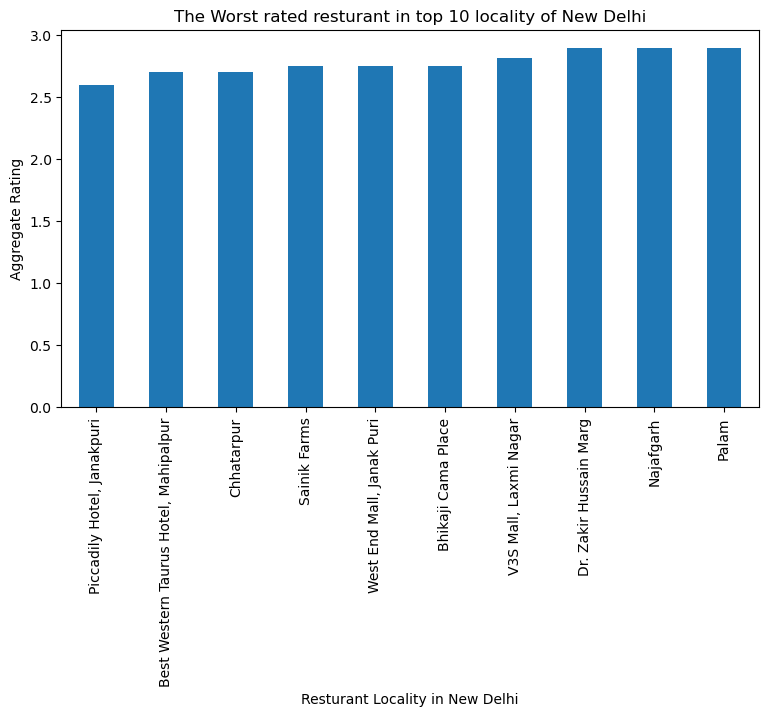

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpuri.

### Which place are suitable for edible person in New Delhi city?

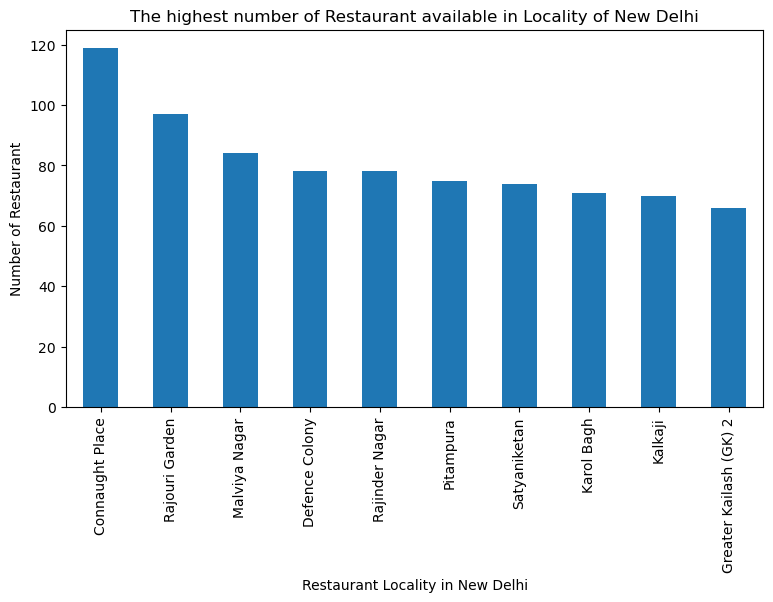

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi=100)

#title
plt.title('The highest number of Restaurant available in Locality of New Delhi')

#bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind = 'bar')

#on x-axis
plt.xlabel('Restaurant Locality in New Delhi')
#on y-axis
plt.ylabel('Number of Restaurant')

#Display
plt.show()

Connaught Place is the best places for edible person to stay there.

### Which place are not suitable for edible person in New Delhi city?

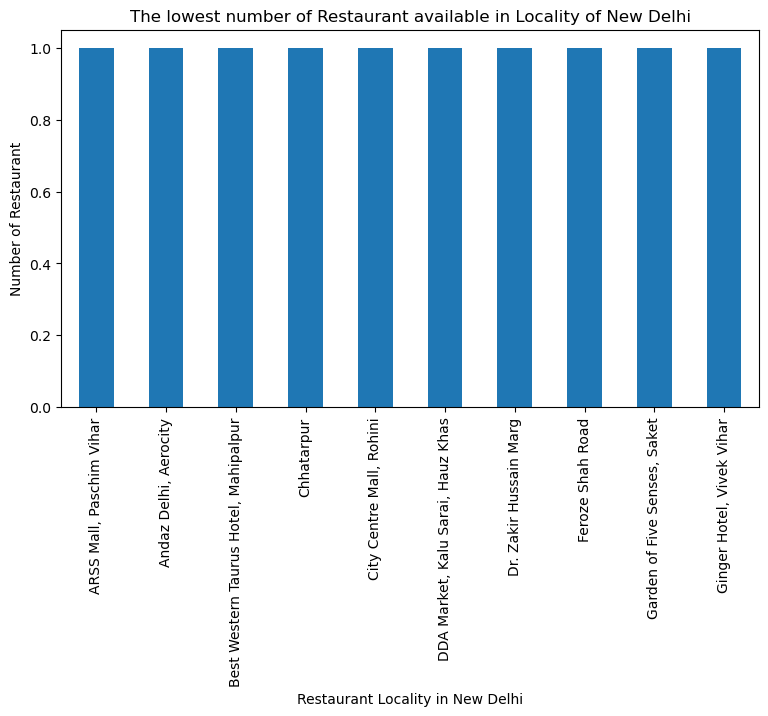

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi=100)

#title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')

#bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind = 'bar')

#on x-axis
plt.xlabel('Restaurant Locality in New Delhi')
#on y-axis
plt.ylabel('Number of Restaurant')

#Display
plt.show()

### What are the best places for chinese restaurant in New Delhi city

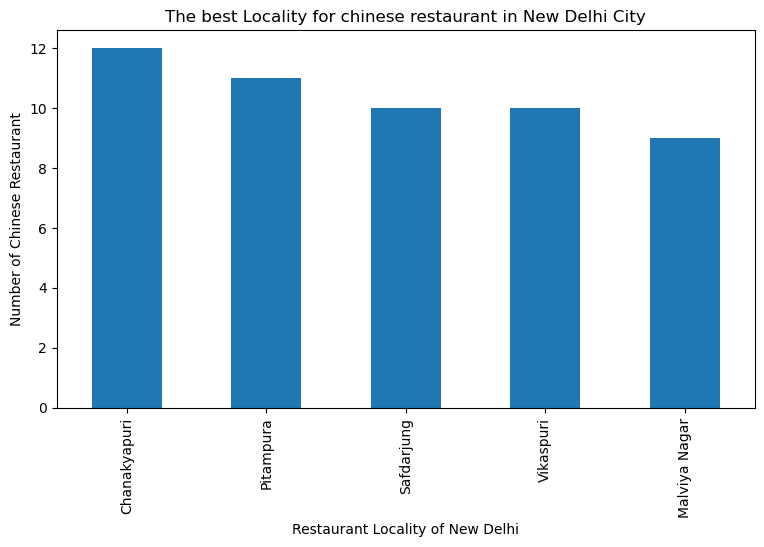

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi=100)

#title
plt.title('The best Locality for chinese restaurant in New Delhi City')

#bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind = 'bar')

plt.xlabel('Restaurant Locality of New Delhi')
plt.ylabel('Number of Chinese Restaurant')

#Display
plt.show()

Chanakyapuri is the best place for Chinese restaurant.

### which places are the best chinese resturants in New Delhi?

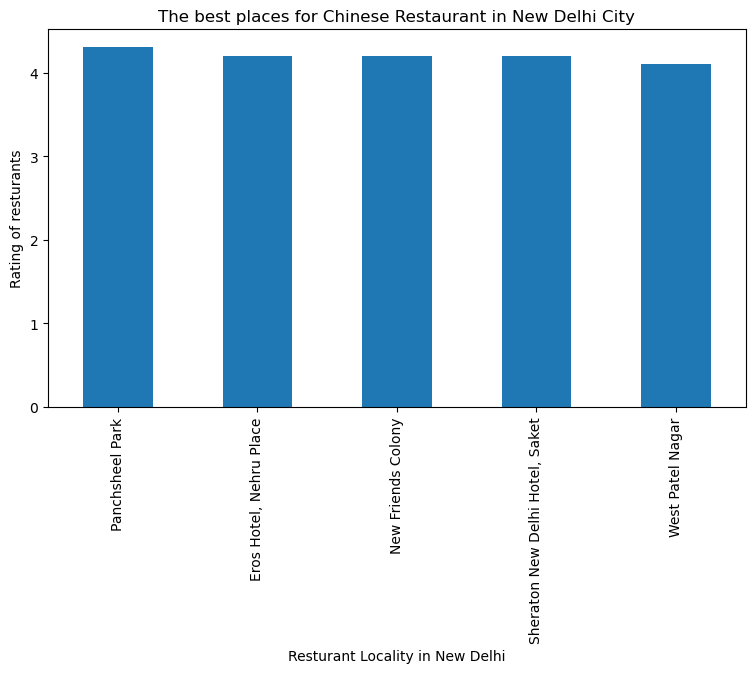

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi=100)

#title
plt.title('The best places for Chinese Restaurant in New Delhi City')

#bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind = 'bar')

#On x-axis
plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#Display
plt.show()

Panchsheel park is best Chinese resturants.

### Data transformation
Based on Locality grouping the data

In [21]:
df_Res_Loc = df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat= df_Res.groupby(['Locality']).mean()['Latitude'].to_frame()
d_Lng= df_Res.groupby(['Locality']).mean()['Longitude'].to_frame()
df_final= pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating, on='Locality').merge(d_R, on='Locality').merge(d_V, on='Locality')


In [22]:
df_final = df_final[df_final['Aggregate rating']!=0.000000] 
df_final.columns=['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [23]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [24]:
## Define Foursquare Credentials and Version
CLIENT_ID = '4A4CSZDNWNJ1JOGR2JTJPB1FCBA3ZYXOYPMHFVXPJU3NWDEV' # Foursquare ID
CLIENT_SECRET = 'ZJD5DIBXO5LXKRVMR1E44LHUDUZU1NI5NNTAMTTQL3MMD1ZB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4A4CSZDNWNJ1JOGR2JTJPB1FCBA3ZYXOYPMHFVXPJU3NWDEV
CLIENT_SECRET:ZJD5DIBXO5LXKRVMR1E44LHUDUZU1NI5NNTAMTTQL3MMD1ZB


## create a function to repeat the same process to all the Locality in New Delhi

In [25]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names,latitudes,longitudes,radius=500,LIMIT=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create API request URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, lat, lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues= pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Locality','Locality Latitude', 
                  'Locality Longitude', 'Venue', 
                  'Venue Latitude', 'Venue Longitude', 
                  'Venue Category']
        return(nearby_venues)

In [27]:

## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [28]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],latitudes=df_final['Lat'],longitudes=df_final['Lng'])

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [29]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [30]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         8                   8      8   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          29                  29     29   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       27                  27     27   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      8                8   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       29               29   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    27               27   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      8  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       29  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    27  

[240 rows x 6 columns]

In [31]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 220 uniques categories.


In [32]:
#Analyzing Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality']

# move locality from row to first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Train Station  Turkish Restaurant  \
0                0                 0  ...              0                   0   
1                0                 0  ...              0                   0   
2                0                 0  ...              0                   0   
3                0                 0  ...              0                   0   
4                0                 0  ...              0                   0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  Yoga Studio  
0           0         0            0              0            0  
1           0         0            0              0            0  
2           0         0            0              0            0  
3           0         0            0              0            0  
4           0         0            0              0            0  

[5 rows x 221 columns]

In [33]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped.head()

Locality       ATM  Accessories Store  \
0       ARSS Mall, Paschim Vihar  0.111111                0.0   
1                        Adchini  0.000000                0.0   
2  Aditya Mega Mall, Karkardooma  0.000000                0.0   
3                       Aerocity  0.000000                0.0   
4  Aggarwal City Mall, Pitampura  0.000000                0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                0.0                 0.0      0.0                 0.0   
1                0.0                 0.0      0.0                 0.0   
2                0.0                 0.0      0.0                 0.0   
3                0.0                 0.0      0.0                 0.0   
4                0.0                 0.0      0.0                 0.0   

   Airport Lounge  Airport Service  Airport Terminal  ...  Train Station  \
0        0.000000              0.0          0.000000  ...            0.0   
1        0.000000              0.0          0.000000  ...            0.0   
2        0.000000              0.0          0.000000  ...            0.0   
3        0.142857              0.0          0.142857  ...            0.0   
4        0.000000              0.0          0.000000  ...            0.0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                 0.0               0.0                            0.0   
1                 0.0               0.0                            0.0   
2                 0.0               0.0                            0.0   
3                 0.0               0.0                            0.0   
4                 0.0               0.0                            0.0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  \
0                    0.0         0.0       0.0          0.0            0.0   
1                    0.0         0.0       0.0          0.0            0.0   
2                    0.0         0.0       0.0          0.0            0.0   
3                    0.0         0.0       0.0          0.0            0.0   
4                    0.0         0.0       0.0          0.0            0.0   

   Yoga Studio  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 221 columns]

In [34]:
New_Delhi_grouped.shape

(240, 221)

In [35]:
## print each locality along with top 5 most commin venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Coffee Shop  0.11
3      Sandwich Place  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café  0.25
1  Indian Restaurant  0.25
2                Pub  0.25
3           Boutique  0.12
4   Parsi Restaurant  0.12


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3   Rental Car Location  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   0.2
1         Pizza Place   0.2
2          Donut Shop   0.2
3     Bed & Breakfast   0.2
4  Chinese Restaurant   0.2


----Agga

In [36]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:

## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma     Indian Restaurant   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
235  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
236                West Patel Nagar           Pizza Place   
237           Worldmark 1, Aerocity                 Hotel   
238                     Yusuf Sarai           Coffee Shop   
239        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1                     Pub                  Café   
2           Shopping Mall             Multiplex   
3             Coffee Shop  Fast Food Restaurant   
4        Department Store       Bed & Breakfast   
..                    ...                   ...   
235     Indian Restaurant                  Café   
236             Juice Bar                  Park   
237       Bed & Breakfast             Hotel Bar   
238     Indian Restaurant    Chinese Restaurant   
239             Hotel Bar           Coffee Shop   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                          Boutique      Parsi Restaurant   
2                       Pizza Place                  Café   
3                  Airport Terminal        Airport Lounge   
4                        Donut Shop    Chinese Restaurant   
..                              ...                   ...   
235                      Restaurant           Pizza Place   
236                  Farmers Market           Event Space   
237             Japanese Restaurant           Coffee Shop   
238                Asian Restaurant              Tea Room   
239             Japanese Restaurant                Buffet   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Chinese Restaurant                   ATM           Pizza Place   
1             Yoga Studio    Falafel Restaurant     French Restaurant   
2                   Hotel            Hotel Pool            Food Court   
3     Rental Car Location            Food Court            Food Truck   
4          Farmers Market    Frozen Yogurt Shop   Fried Chicken Joint   
..                    ...                   ...                   ...   
235   American Restaurant             Multiplex         Shopping Mall   
236   Fried Chicken Joint     French Restaurant            Food Truck   
237                Lounge     Indian Restaurant    Punjabi Restaurant   
238                   Bar                Lounge     Korean Restaurant   
239     Indian Restaurant    Punjabi Restaurant          Cocktail Bar   

         9th Most Common Venue  10th Most Common Venue  
0                 Dessert Shop  Furniture / Home Store  
1                   Food Truck              Food Court  
2    Indian Chinese Restaurant       Food & Drink Shop  
3                  Event Space       French Restaurant  
4            French Restaurant              Food Truck  
..                         ...                     ...  
235             Cosmetics Shop                  Garden  
236                 Food Court       Food & Drink Shop  
237                     Buffet            Cocktail Bar  
238                       Park                   Hotel  
239        Dumpling Restaurant                  Bakery  

[240 rows x 11 columns]

In [41]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality',1)

#run k=means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
kmeans.labels_.shape

(240,)

In [42]:
# add clustering labels

New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'),on='Locality')

New_Delhi_merged.head()

<ipython-input-42-ce5c92016332>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               2   
1  Average, Good, Poor, Very Good         1560               2   
2                   Average, Good          434               2   
3                         Average           59               3   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1     Indian Restaurant                   Pub                  Café   
2     Indian Restaurant         Shopping Mall             Multiplex   
3                 Hotel           Coffee Shop  Fast Food Restaurant   
4           Pizza Place      Department Store       Bed & Breakfast   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop    Chinese Restaurant   
1                        Boutique      Parsi Restaurant           Yoga Studio   
2                     Pizza Place                  Café                 Hotel   
3                Airport Terminal        Airport Lounge   Rental Car Location   
4                      Donut Shop    Chinese Restaurant        Farmers Market   

  7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
0                   ATM           Pizza Place               Dessert Shop   
1    Falafel Restaurant     French Restaurant                 Food Truck   
2            Hotel Pool            Food Court  Indian Chinese Restaurant   
3            Food Court            Food Truck                Event Space   
4    Frozen Yogurt Shop   Fried Chicken Joint          French Restaurant   

   10th Most Common Venue  
0  Furniture / Home Store  
1              Food Court  
2       Food & Drink Shop  
3       French Restaurant  
4              Food Truck

In [43]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
4    28.690020    3.033333                         Average          126   
5    28.700516    3.040000             Average, Good, Poor          594   
15   28.691136    3.390909        Average, Good, Very Good          485   
22   28.654105    3.085714                         Average           80   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
89   28.539003    3.150000             Average, Good, Poor          893   
90   28.642755    3.450000                   Average, Good          322   
94   28.538153    3.117143             Average, Good, Poor         3642   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
135  28.579641    3.180000                   Average, Good          202   
152  28.544464    3.525000              Average, Very Good          231   
161  28.639872    3.134483             Average, Good, Poor         1481   
170  28.643757    3.575000                   Average, Good         2879   
181  28.571849    3.316667                   Average, Good          472   
188  28.707685    3.168182        Average, Good, Very Good         1668   
190  28.577107    3.100000                         Average          114   
198  28.636712    3.023529                   Average, Poor          185   
225  28.524070    3.686364        Average, Good, Very Good         4001   
231  28.637492    3.062264             Average, Good, Poor         1253   
233  28.695096    3.050000                         Average           86   
236  28.648177    3.675000        Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4                 0           Pizza Place      Department Store   
5                 0           Pizza Place            Restaurant   
15                0                Garden  Gym / Fitness Center   
22                0           Pizza Place  Fast Food Restaurant   
50                0           Pizza Place     Convenience Store   
57                0           Pizza Place            Food Truck   
73                0           Pizza Place     Convenience Store   
89                0           Pizza Place          Soccer Field   
90                0           Pizza Place  Fast Food Restaurant   
94                0                Market  Fast Food Restaurant   
101               0           Pizza Place           Bus Station   
103               0     Convenience Store     Fish & Chips Shop   
104               0           Pizza Place                  Park   
130               0           Pizza Place         Shopping Mall   
132               0           Pizza Place    Frozen Yogurt Shop   
135               0           Pizza Place      Department Store   
152               0           Gaming Cafe           Pizza Place   
161               0           Pizza Place        Ice Cream Shop   
170               0     Indian Restaurant  Fast Food Restaurant   
181               0  Fast Food Restaurant           Snack Place   
188               0           Pizza Place                 Hotel   
190               0           Pizza Place          Gourmet Shop   
198               0           Pizza Place            Restaurant   
225               0           Pizza Place          Dessert Shop   
231               0           Pizza Place     Indian Restaurant   
233               0        Ice Cream Shop           Yoga Studio   
236               0           Pizza Place             Juice Bar   

       3rd Most Common Venue     

In [45]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
8    28.555599    3.800000        Average, Very Good         2411   
9    28.659870    3.281481             Average, Good         1309   
11   28.562580    3.750000  Average, Good, Very Good          875   
..         ...         ...                       ...          ...   
230  28.658041    3.400000                   Average           19   
232  28.667344    3.077273       Average, Good, Poor          939   
234  28.630044    2.750000             Average, Poor          238   
235  28.652978    3.500000                      Good          178   
238  28.559928    3.075000             Average, Good          923   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
6                 1                Market              Coffee Shop   
7                 1           Coffee Shop                     Café   
8                 1                  Café                  Stadium   
9                 1                  Café             Burger Joint   
11                1      Department Store  Comfort Food Restaurant   
..              ...                   ...                      ...   
230               1           Snack Place              Art Gallery   
232               1             Juice Bar          Bed & Breakfast   
234               1        Sandwich Place              Pizza Place   
235               1  Fast Food Restaurant        Indian Restaurant   
238               1           Coffee Shop        Indian Restaurant   

    3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
6       Food & Drink Shop            Steakhouse  New American Restaurant   
7           Shopping Mall  Fast Food Restaurant       Italian Restaurant   
8            Dessert Shop  Other Great Outdoors            Metro Station   
9           Burrito Place           Yoga Studio     Fast Food Restaurant   
11            Karaoke Bar  Fast Food Restaurant       Falafel Restaurant   
..                    ...                   ...                      ...   
230          Burger Joint         Burrito Place                      Gym   
232             Gift Shop                  Café       Athletics & Sports   
234            Restaurant         Metro Station     Fast Food Restaurant   
235                  Café            Restaurant              Pizza Place   
238    Chinese Restaurant      Asian Restaurant                 Tea Room   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6             Yoga Studio   Fried Chicken Joint     French Restaurant   
7        Asian Restaurant     Indian Restaurant        Clothing Store   
8             Music Venue                 Hotel           Coffee Shop   
9      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
11     Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
..                    ...                   ...                   ...   
230                  Café                  Park               Dog Run   
232           Yoga Studio  Fast Food Restaurant    Frozen Yogurt Shop   
234    Chinese Restaurant    Light Rail Station       Business Center   
235   American Restaurant             Multiplex         Shopping Mall   
238                   Bar                Lounge     Korean Restaurant   

    9th Most Common Venue 10th Most Common Venue  
6              Food Truck             Food Court  
7      Chinese Restaurant           Burger Joint  
8             Golf Course      Fish & Chips Shop  
9              Food Truck             Food Court  
11             Food Truck             Food Court  
..                    ...                    ...  
230     Fish & Chips Shop    Fried Chicken Joint  
232   Fried Chicken Joint      French Restaurant  
234           Music Store            Coffee Shop  
235        Cosmetics Shop                

In [46]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                        Average, Good          434   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
23   28.656414    3.358182             Average, Good, Very Good         6668   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
25   28.495624    2.700000                              Average           23   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
44   28.574288    3.496154       Average, Good, Poor, Very Good        15579   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
61   28.668181    3.400000                              Average           33   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
110  28.635391    3.040385       Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
153  28.608055    3.860000             Average, Good, Very Good         7978   
156  28.630734    3.185714                        Average, Good          244   
160  28.712975    3.066667                              Average          121   
165  28.539464    2.900000                              Average           14   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
199  28.601779    3.700000             Average, Good, Very Good          964   
201  28.651299    3.500000                        Average, Good          479   
202  28.646593    3.280952             Average, Good, Very Good         1624   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
210  28.661133    3.775000                      Good, Very Good          460   
211  28.579556    3.780000                                 Good          709   
212  28.592147    3.350000                        Average, Good          189   
215  28.605

In [47]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
3    28.553077    3.200000                         Average           59   
10   28.554807    3.000000                         Average            4   
16   28.630440    3.208333             Average, Good, Poor         1779   
19   28.548827    2.700000                         Average            9   
35   28.590297    3.350000                   Average, Good          127   
56   28.570246    4.050000              Average, Excellent         1949   
60   28.665829    4.000000                       Very Good          756   
69   28.550327    3.300000                         Average           30   
70   28.590654    3.550000                   Average, Good          302   
72   28.705700    3.350000                   Average, Good          278   
74   28.621267    3.416667                   Average, Good          475   
83   28.552895    3.300000                         Average           15   
111  28.618772    3.666667        Average, Good, Very Good          725   
112  28.552036    3.500000                            Good           26   
119  28.545033    2.960000                   Average, Good          259   
128  28.608252    2.945000                   Average, Good          406   
149  28.642910    2.996552  Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                         Average           50   
163  28.552711    3.100000                         Average            7   
169  28.667261    3.200000                         Average           76   
174  28.550802    3.250000                   Average, Good           34   
189  28.620715    3.880000        Average, Good, Very Good          626   
197  28.592724    2.985714                         Average          560   
205  28.600171    3.714286        Average, Good, Very Good         1733   
213  28.623619    3.466667                   Average, Good         1141   
217  28.535183    3.066667                         Average           37   
220  28.523519    3.700000                            Good          281   
237  28.550257    3.220000                   Average, Good           77   
239  28.551398    3.100000                         Average            9   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 3                 Hotel               Coffee Shop   
10                3                 Hotel               Coffee Shop   
16                3                 Hotel                      Café   
19                3                 Hotel         Accessories Store   
35                3                 Hotel         Indian Restaurant   
56                3                 Hotel          Sculpture Garden   
60                3                 Hotel                      Café   
69                3                 Hotel           Bed & Breakfast   
70                3                 Hotel                Restaurant   
72                3                Garden               Coffee Shop   
74                3                 Hotel         Indian Restaurant   
83                3                 Hotel                 Hotel Bar   
111               3                 Hotel         Indian Restaurant   
112               3                 Hotel                 Hotel Bar   
119               3                 Hotel       American Restaurant   
128               3                 Hotel               Yoga Studio   
149               3                 Hotel         Indian Restaurant   
162               3                 Hotel                      Café   
163               3                 Hotel       Japanese Restaurant   
169               3                 Hotel         Indian Restaurant   
174               3                 Hotel                 Hotel Bar   
189               3                 Hotel         Indian Restaurant   
197               3                 Hotel          Department Store   
205               3                 Hotel               

In [48]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
55  28.617102    4.200000      Very Good         3010               4   
59  28.654883    3.053846  Average, Good          262               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
55     Indian Restaurant           Yoga Studio    Falafel Restaurant   
59     Indian Restaurant           Yoga Studio    Falafel Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
55    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
59    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
55            Food Truck            Food Court     Food & Drink Shop   
59            Food Truck            Food Court     Food & Drink Shop   

   10th Most Common Venue  
55                   Food  
59                   Food

## Conclusion
* Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
* Pancsheel park, Nehru place have the best Chinese Resturant.
* Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
* Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels and nightclub. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and pizza.